# Úkol č. 1 - vizualizace dat a web scraping (do 20. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.volby.cz týkající se voleb do zastupitelstva Vámi vybraného (většího) města, uložit tato data v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Výběr zdroje dat

Vyberte si větší město, které má zastupitelstvo druhu 3 (Zastupitelstvo statutárního města) a strojově stáhněte informace o stranách a kandidátkách z následujících let:
 * [2002](https://www.volby.cz/pls/kv2002/kv12?xjazyk=CZ&xid=0), [2006](https://www.volby.cz/pls/kv2006/kv12?xjazyk=CZ&xid=0), [2010](https://www.volby.cz/pls/kv2010/kv12?xjazyk=CZ&xid=0), [2014](https://www.volby.cz/pls/kv2014/kv12?xjazyk=CZ&xid=0) a [2018](https://www.volby.cz/pls/kv2018/kv12?xjazyk=CZ&xid=0).
 

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data pro vybrané město a uložte je všechny do (asi dvou) přehledných tabulek ve formátu _csv_.
  * Data musí obsahovat _alespoň_ toto:
    * Vývoj výsledků (v procentech i počtu hlasů) pro jednotlivé strany v jednotlivých letech.
    * Seznam všech kandidátů všech stran v jednotlivých letech, u kandidáta by mělo být zaznamenáno: jméno, věk v době voleb, navrhující strana, politická příslušnost, volební zisk (procento i počet hlasů), pořadí na kandidátce, pořadí zvolení, jestli získal mandát (tyto informace získáte souhrnně ve _jmenných seznamech_).
  * V druhé části Vašeho Jupyter notebooku pracujte s těmito tabulkami načtenými z _csv_ souboru (aby opravující nemusel spouštět stahování z webu).
  * Tabulky ve formátu _csv_ také odevzdejte.
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Časový vývoj (po rocích voleb) počtu kandidujících stran i lidí a to celkově i po jednotlivých stranách (ve volbách, kterých se daná strana účastnila).
    * Věkovou strukturu kandidátů celkově i za jednotlivé strany a vývoj této struktury během jednotlivých voleb.
    * Časový vývoj volební účasti a volebních výsledků jednotlivých stran.
    * Časový vývoj podílu kandidujících s titulem a bez titulu.

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * (až +2 body) U titulů se pokuste rozlišit i různé stupně vzdělání: bakalářský, magisterský, doktorský a vyšší, vojenská hodnost atp. Zkuste odhadnout i podíl žen na kandidátkách.
  * (až +4 body) Pokuste se u jednotlivých kandidátů zjistit, zda kandidovali ve více volbách. Najděte 10 nejpilnějších kandidátů a vypište jejich volební zisky a za jaké strany kandidovali.
  * (až +2 body) Najděte nějaký balíček, který Vám dovolí do Vašeho notebooku zavést interaktivní prvky, např. si vyberete v select-boxu stranu a Váš notebook zobrazí grafy pouze pro ni atp.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte nejen Jupyter Notebook, ale i _csv_ soubor(y) se staženými daty.
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [129]:
import numpy as np
import pandas as pd
import sklearn as skit
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import copy

In [130]:
party_data = []
people_data = []
summary_data = []

years = [2018, 2014, 2010, 2006]

for year in years:
    '''
        celkové načtení dat a základní úprava hlaviček
    '''
    url = 'https://www.volby.cz/pls/kv' + str(year) + '/kv1111?xjazyk=CZ&xid=1&xdz=3&xnumnuts=5103&xobec=563889&xstat=0&xvyber=0'
    dfs = pd.read_html(url,flavor='html5lib')
    dfs[1].columns = dfs[1].columns.to_frame()[1]
    dfs[1]["Rok"] = np.full(len(dfs[1]), year)
    party_data.append(dfs[1])
    summary_data.append(dfs[0])
    url = 'https://www.volby.cz/pls/kv' + str(year) + '/kv21111?xjazyk=CZ&xid=1&xv=11&xdz=3&xnumnuts=5103&xobec=563889&xstrana=0'
    dfs = pd.read_html(url,flavor='html5lib')
    dfs[0].columns = dfs[0].columns.to_frame()[1]
    dfs[0]["v %"] = dfs[0]["v %"] / 100
    dfs[0]["Rok"] = np.full(len(dfs[0]), year)
    people_data.append(dfs[0])
    
# data pro strany roku 2002
url = 'http://www.volby.cz/pls/kv2002/kv1211?xjazyk=CZ&xid=1&xv=1&xdz=3&xnumnuts=5103'
party_data_2002 = pd.read_html(url, displayed_only=False)
summary_data.append(party_data_2002[0])

# data z jmennych seznamu roku 2002
url = 'http://www.volby.cz/pls/kv2002/kv21111?xjazyk=CZ&xid=1&xv=11&xdz=3&xnumnuts=5103&xobec=563889&xstrana=0'
people_data_2002 = pd.read_html(url, displayed_only=False)
people_data_2002[0].columns = people_data_2002[0].columns.to_frame()[1]
people_data_2002[0]["Rok"] = np.full(len(people_data_2002[0]), 2002)

In [131]:
# uprava hlavicek dat
summary = copy.deepcopy(summary_data)
for i in range(4):
    summary[i].columns = summary[i].columns.to_frame()[1]
    summary[i] = summary[i].drop(columns=["v %", "Početvolebníchobvodů"])
    summary[i]["Rok"] = np.full(len(summary[i]), years[i])
    summary[i]["Volebníúčast v %"] = summary[i]["Volebníúčast v %"]/100 
summary[4].columns = summary[4].columns.to_frame()[1]
summary[4] = summary[4].drop(columns=["celkem", "zvolená"])
summary[4]["Rok"] = np.full(len(summary[4]), 2002)
summary[4].columns = summary[0].columns
summary = pd.concat(summary)

In [132]:
# Řešení titulů pro roky 2006 - 2018
# Rozpoznávaé tituly
titles = ["Bc.", "BcA.", "Ing.", "Ing. arch.", "MUDr.", "MVDr.", "Mgr.", "MgA.", "JUDr.", "PhDr.", "RNDr.", "PharmDr.", "ThLic.", "ThDr.", "Ph.D.", "Ph.D.", "Th.D.", "CSc.", "DrSc.", "doc.", "prof."]

for df in people_data:
    cols = list(df)
    cols.insert(4, "Tituly")
    df["Tituly"] = np.nan
    df.columns = cols
    buffer = []
    name_frame = []
    title_frame = []
    for index, name in enumerate(cols):
        tmp = copy.deepcopy(df[name])
        if index > 4: # posun sloupců doleva
            df[name] = copy.deepcopy(buffer)
        buffer = copy.deepcopy(tmp)
    for index, row in df.iterrows():
        arr = row["příjmení, jméno, tituly"].split()
        title = ""
        new_name = ""
        if len(arr) < 3:
            title_frame.append("")
            name_frame.append(row["příjmení, jméno, tituly"])
            continue
        for name in arr:
            if name in titles: 
                title = title + " " + name
            else:
                if new_name == "":
                    new_name = name
                else:
                    new_name = new_name + " " + name
        title_frame.append(title)
        name_frame.append(new_name)
    df["Tituly"] = title_frame
    df["příjmení, jméno, tituly"] = name_frame


In [133]:
display(people_data_2002[0].columns)
display(people_data[3].columns)

Index(['Kandidátnílistina', 'Kandidátnílistina.1', 'Poř.číslo',
       'Příjmení, jméno', 'Tituly', 'Věk', 'Navrh.strana', 'Polit.přísl.',
       'abs.', 'v %', 'Pořadí', 'Mandát', 'Rok'],
      dtype='object', name=1)

Index(['číslo', 'název', 'poř.číslo', 'příjmení, jméno, tituly', 'Tituly',
       'věk', 'Navrhujícístrana', 'Politickápříslušnost', 'abs.', 'v %',
       'Pořadízvolení/náhradníka', 'Mandát', 'Rok'],
      dtype='object')

In [134]:
# převedení hlaviček na stejné
people_data_2002[0].columns = people_data[0].columns
people_data.append(people_data_2002[0])

In [135]:
df = copy.deepcopy(people_data_2002[0])
name_frame = []
for index, row in df.iterrows():
    arr = row["příjmení, jméno, tituly"].split()
    new_name = ""
    for name in arr:
        if new_name == "":
            new_name = name
        else:
            new_name = new_name + " " + name
    name_frame.append(new_name)
df["příjmení, jméno, tituly"] = name_frame
people_data_2002[0]["příjmení, jméno, tituly"] = name_frame

In [136]:
party_data_2002[0].columns = party_data_2002[0].columns.to_frame()[1]
party_data_2002[1].columns = party_data_2002[1].columns.to_frame()[1]
party_data_2002[1]["Rok"] = np.full(len(party_data_2002[1]), 2002)

In [137]:
for index, df in enumerate(party_data): 
    party_data[index] = party_data[index].drop(columns = ["číslo", "Početkandidátů", "Přepočtenýzákladdle počtukandidátů", "Podílyhlasů"])
    party_data[index]["v %"] = party_data[index]["v %"]/100

In [138]:
display(party_data_2002[1].columns)
display(party_data[0].columns)

Index(['Volební strana', 'abs.', 'v %', 'abs.', 'v %', 'Rok'], dtype='object', name=1)

Index(['název', 'abs.', 'v %', 'Přepočtené %platných hlasů', 'Početmandátů',
       'Rok'],
      dtype='object', name=1)

In [139]:
# převedení hlaviček na stejné pro jednotlivé strany
party_data_2002[1].columns = party_data[0].columns
party_data_2002[1].columns

party_data_2002[1]['Přepočtené %platných hlasů'], party_data_2002[1]['Početmandátů'] = party_data_2002[1]['Početmandátů'], party_data_2002[1]['Přepočtené %platných hlasů']
party_data_2002[1]['Přepočtené %platných hlasů'] = np.nan
party_data.append(party_data_2002[1])

In [140]:
# finální spojení dat z jednotlivých let a přejmenování odlišných názvů stran
party_result = pd.concat(party_data)
party_result = party_result.replace(regex=[r'Komunistická str.Čech a Moravy'], value='Komunistická strana Čech a Moravy')
party_result = party_result.replace(regex=[r'Česká str.sociálně demokrat.'], value='Česká strana sociálně demokratická')
party_result = party_result.drop(columns = ["Přepočtené %platných hlasů"])
#party_result.groupby(["název"]).size()

In [141]:
# finální spojení dat ze jmenných seznamů
people_result = pd.concat(people_data)

In [142]:
# uložení dat do csv souborů
pd.DataFrame(party_result).to_csv("party_data.csv")
pd.DataFrame(people_result).to_csv("people_data.csv")
pd.DataFrame(summary).to_csv("summary.csv")

In [143]:
# kontrola funkčnosti zpětného načtení dat
data1 = pd.read_csv('party_data.csv')
data2 = pd.read_csv('people_data.csv', na_values=["", "-"])

### Používáne funkce v následující části

In [144]:
# staženo z https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 0),
                    textcoords="offset points",
                    ha='center', va='bottom')

In [145]:
# zdroj: https://stackoverflow.com/questions/51676506/bar-chart-with-label-name-and-value-on-top-in-pandas
def autolabel2(ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for p in ax.patches:
        ax.annotate('{:d}'.format(int(float(p.get_height()))), (p.get_x(), p.get_height()))

In [146]:
def getYears():
    """vrácení všech relevantních let"""
    return [2018, 2014, 2010, 2006, 2002]

### Zobrazení počtu kandidátů, kandidujících stran atd.

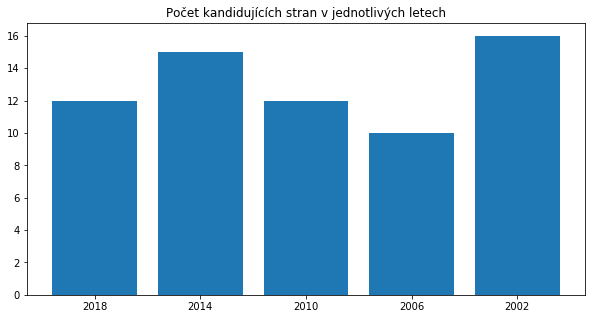

In [147]:
years = [2018, 2014, 2010, 2006, 2002]
data = pd.read_csv('people_data.csv', na_values=["", "-"])
candidating_parties = {}
fig, ax = plt.subplots()
for year in years: 
    df = data.loc[data.Rok == year]
    df = df.groupby(["Rok", "název"]).size()
    candidating_parties[year] = len(df[year])
rect = ax.bar(range(len(candidating_parties)), list(candidating_parties.values()), align='center')
plt.xticks(range(len(candidating_parties)), list(candidating_parties.keys()))
plt.title("Počet kandidujících stran v jednotlivých letech")
### Pokuste se u jednotlivých kandidátů zjistit, zda kandidovali ve více volbách. Najděte 10 nejpilnějších kandidátů a vypište jejich volební zisky a za jaké strany kandidovali.### Pokuste se u jednotlivých kandidátů zjistit, zda kandidovali ve více volbách. Najděte 10 nejpilnějších kandidátů a vypište jejich volební zisky a za jaké strany kandidovali.autolabel(rect)
plt.show()

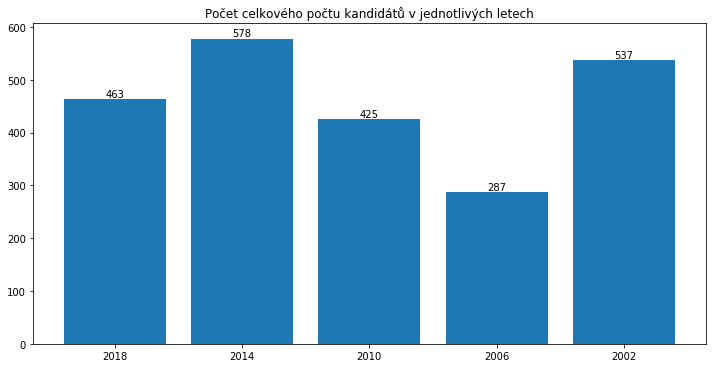

In [148]:
years = [2018, 2014, 2010, 2006, 2002]
data = pd.read_csv('people_data.csv', na_values=["", "-"])
candidates = {}
fig, ax = plt.subplots()
for year in years: 
    df = data.loc[data.Rok == year]
    df = df.groupby(["Rok"]).size()
    candidates[year] = df[year]
rect = ax.bar(range(len(candidates)), list(candidates.values()), align='center', label = "asdas")
plt.xticks(range(len(candidates)), list(candidates.keys()))
autolabel(rect)
fig.tight_layout()
plt.title("Počet celkového počtu kandidátů v jednotlivých letech")
plt.show()

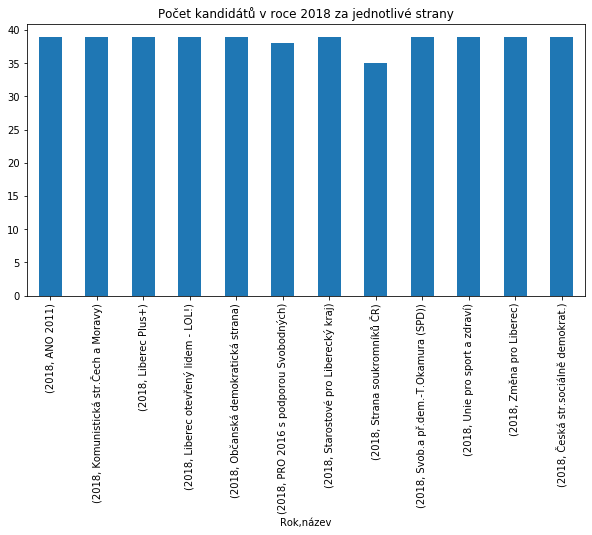

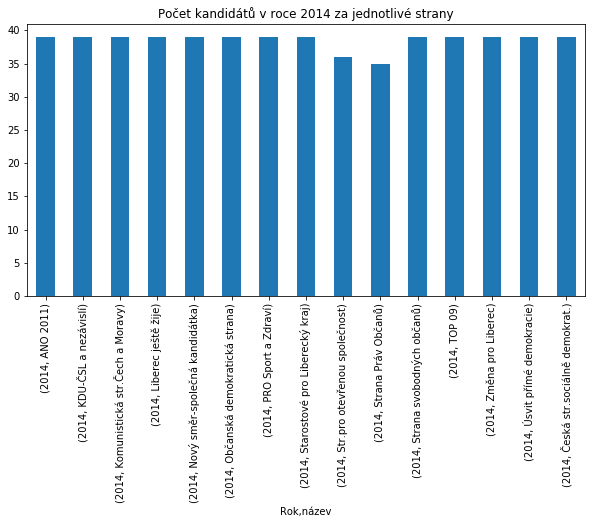

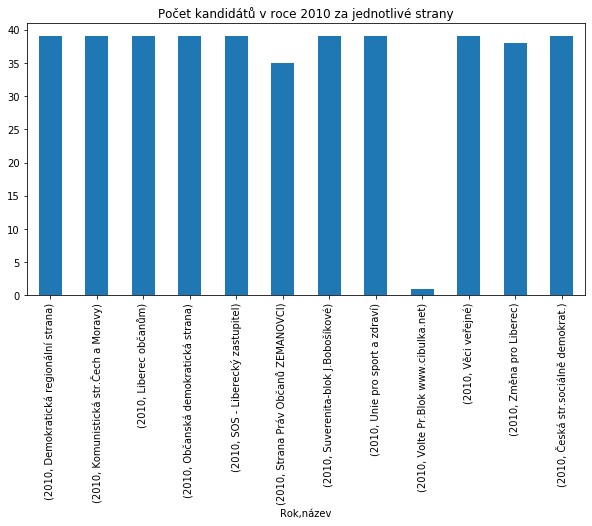

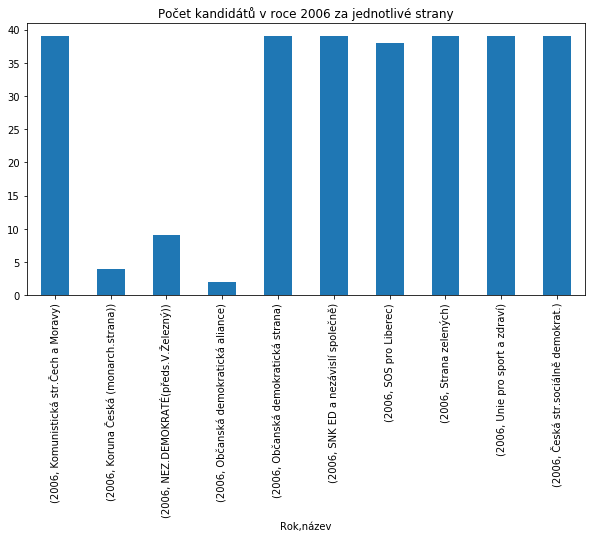

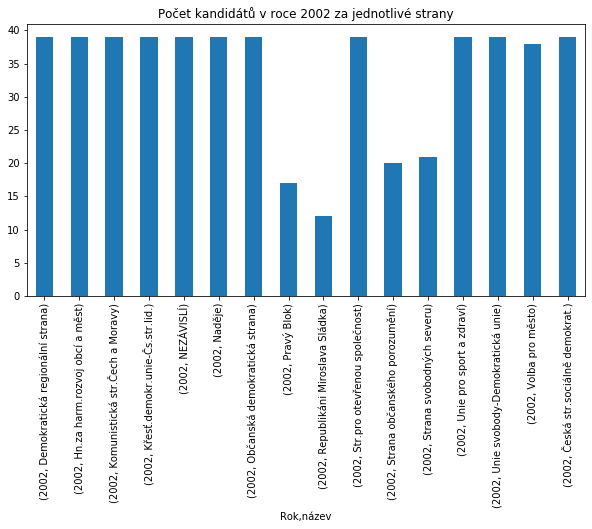

In [149]:
years = [2018, 2014, 2010, 2006, 2002]
data = pd.read_csv('people_data.csv', na_values=["", "-"])
for year in years: 
    df = data.loc[data.Rok == year]
    df = df.groupby(["Rok", "název"]).size()
    df.plot(kind='bar')
    plt.title("Počet kandidátů v roce " + str(year) + " za jednotlivé strany")
    plt.show()

### Statistiky týkající se titulů

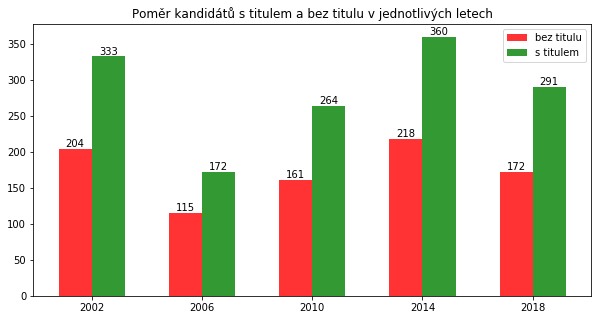

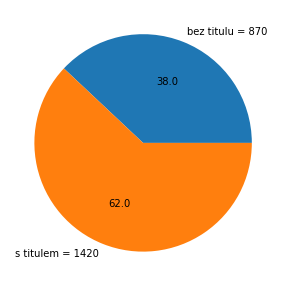

In [202]:
data = pd.read_csv('people_data.csv', na_values=["", "-"])
data["Tituly"] = pd.isna(data2["Tituly"])
data = data.groupby(["Tituly", "Rok"]).size()
bar_width = 0.3
opacity = 0.8
index = np.arange(5)

fig, ax = plt.subplots()


rects1 = ax.bar(index, data[0], bar_width,
alpha=opacity,
color='r',
label='bez titulu')

rects2 = ax.bar(index + bar_width, data[1], bar_width,
alpha=opacity,
color='g',
label='s titulem')

autolabel(rects1)
autolabel(rects2)
plt.xticks(index + bar_width/2, range(2002, 2020, 4))
plt.legend()
plt.title("Poměr kandidátů s titulem a bez titulu v jednotlivých letech")
plt.show()
data = pd.read_csv('people_data.csv', na_values=["", "-"])
data["Tituly"] = pd.isna(data2["Tituly"])
df = data.groupby("Tituly").size()
plt.pie([df[0], df[1]], labels=["bez titulu = " + str(df[0]), "s titulem = " + str(df[1])], autopct="%1.1f")
plt.show()

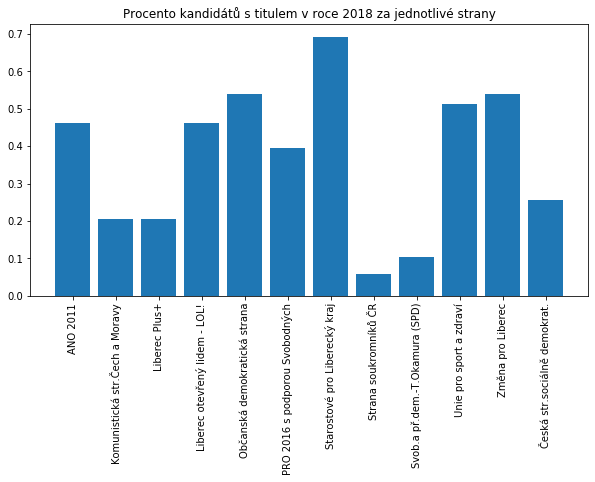

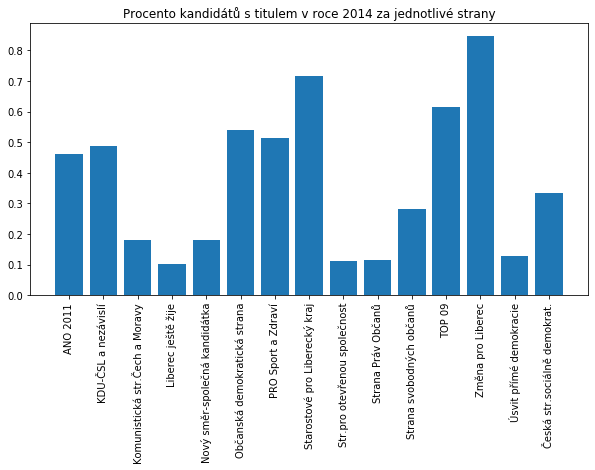

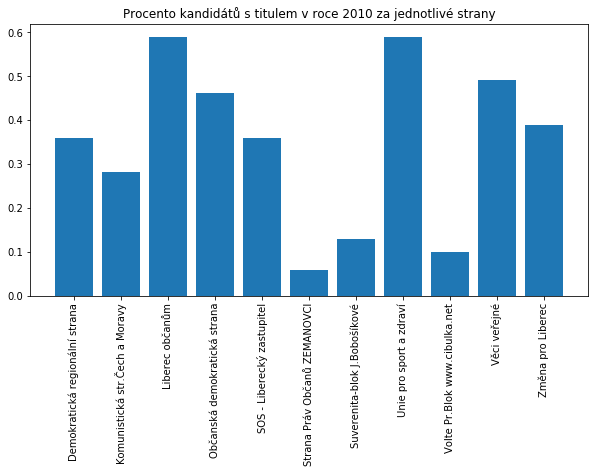

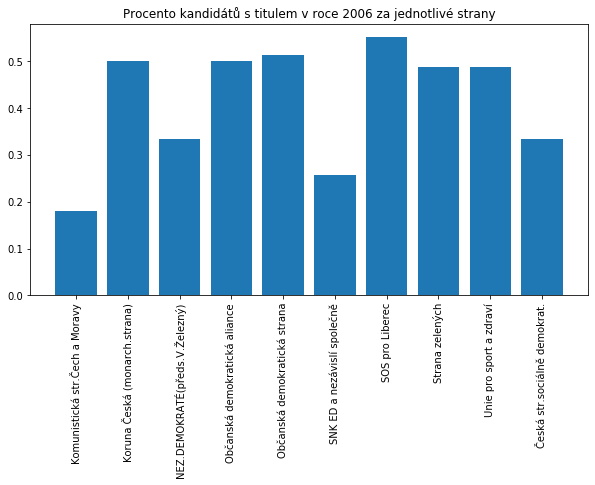

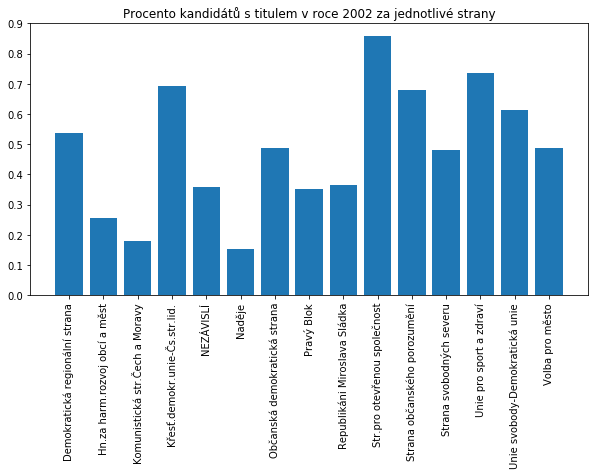

In [151]:
data = pd.read_csv('people_data.csv', na_values=["", "-"])
data["Tituly"] = pd.isna(data2["Tituly"])
for year in getYears():
    df = data.loc[data.Rok == year]
    df = df.groupby(["název", "Tituly"]).size()
    fig, ax = plt.subplots()
    stats = {}
    for i in range(0, len(df) - 1, 2):
        stats[df.keys()[i][0]] = df[i]/(df[i] + df[i+1]) # stats[nazev strany] = procento lidi s titulem
    rect = ax.bar(range(len(stats)), list(stats.values()), align='center', label = "asdas")
    plt.xticks(range(len(stats)), list(stats.keys()), rotation="vertical")
    plt.title("Procento kandidátů s titulem v roce " + str(year) + " za jednotlivé strany")
    plt.show()

### Statistiky týkající se věku kandidátů

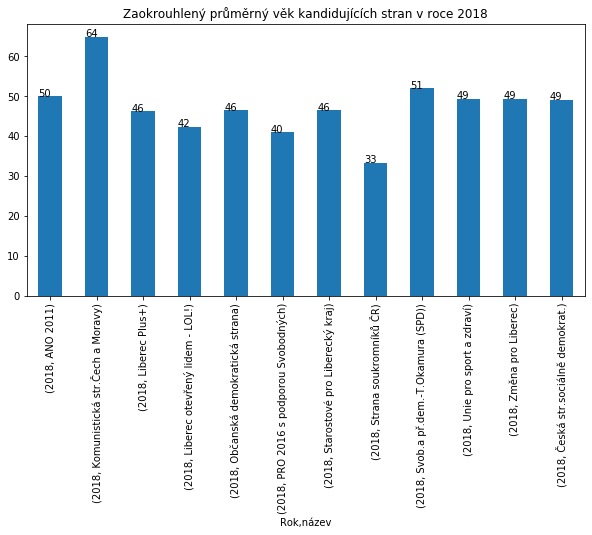

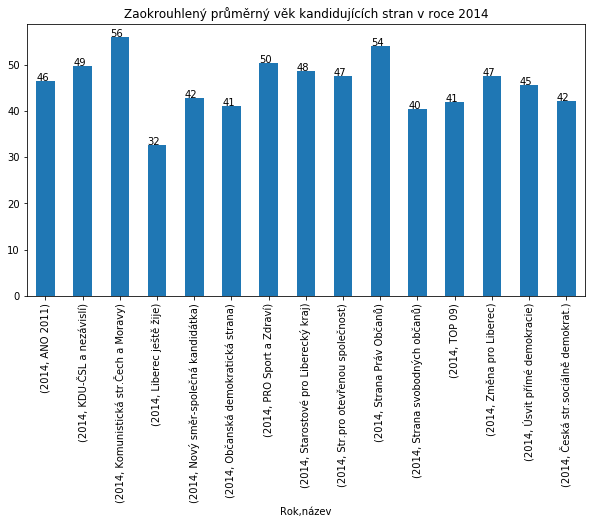

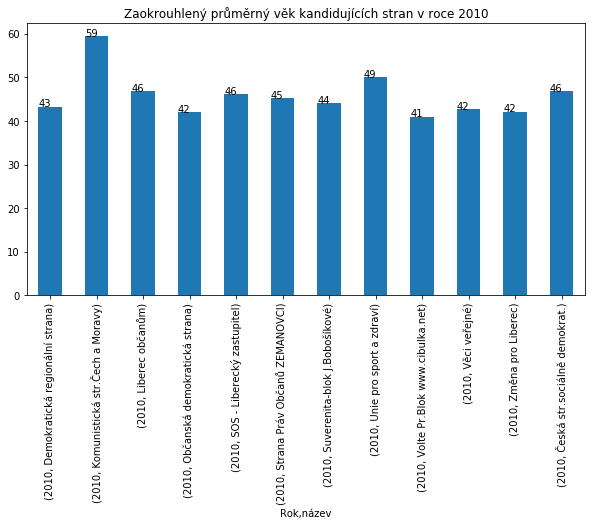

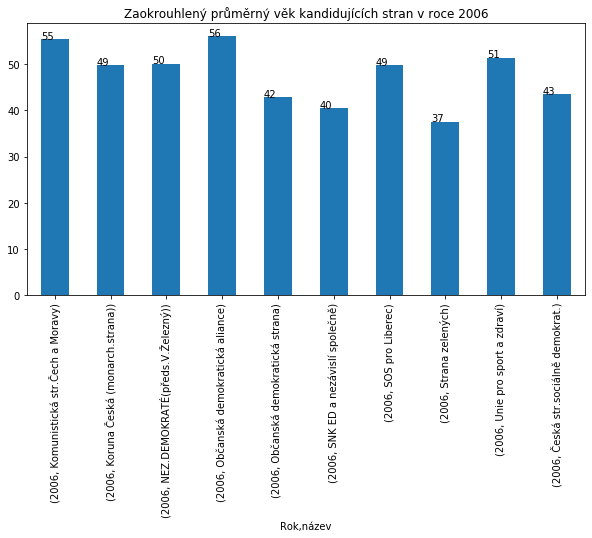

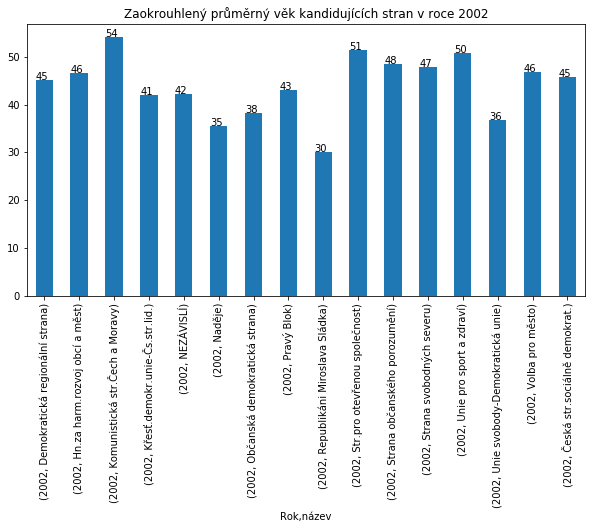

In [152]:
years = [2018, 2014, 2010, 2006, 2002]
data = pd.read_csv('people_data.csv', na_values=["", "-"])
for year in years: 
    fig, ax = plt.subplots()
    df = data.loc[data.Rok == year]
    df = df.groupby(["Rok", "název"]).mean()
    df = df["věk"]
    ax = df.plot(kind='bar')
    autolabel2(ax)
    plt.title("Zaokrouhlený průměrný věk kandidujících stran v roce " + str(year))
    plt.show()

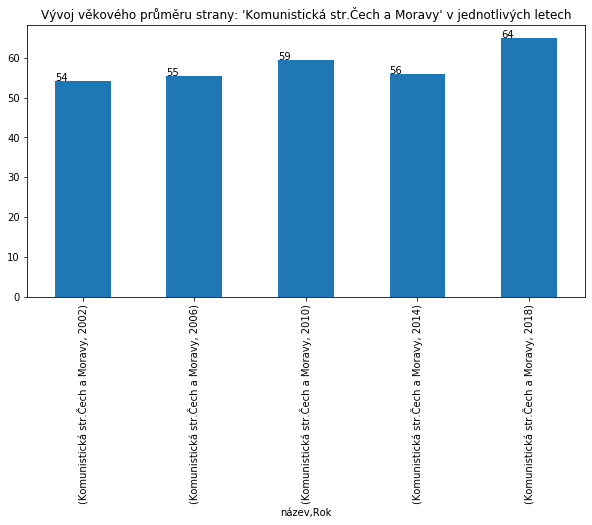

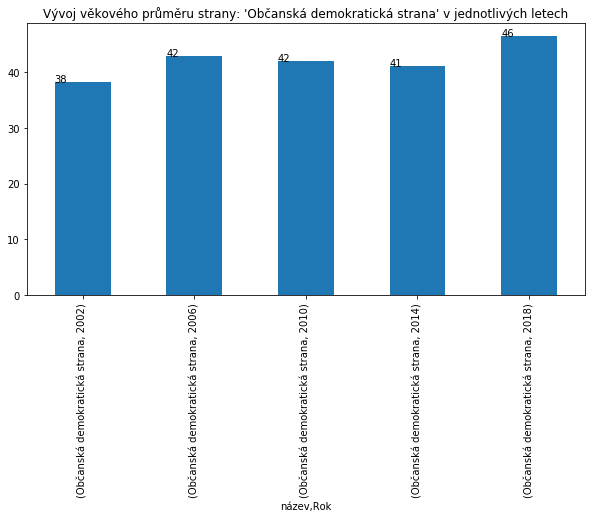

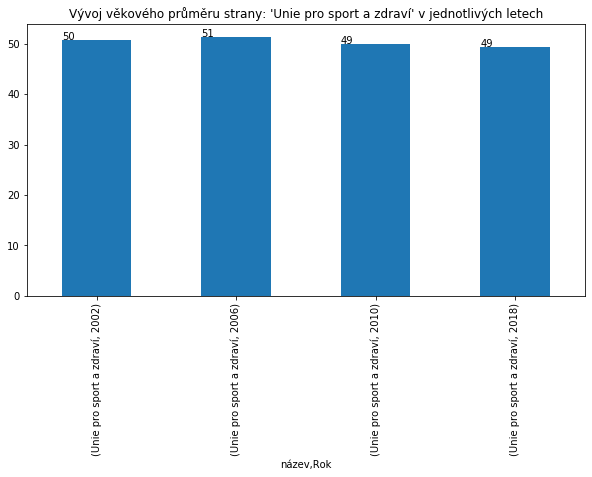

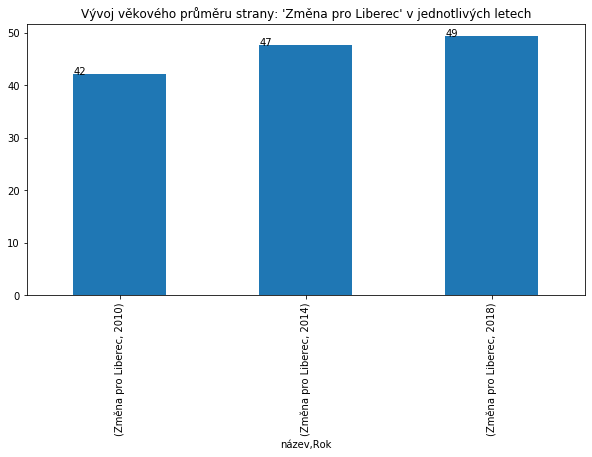

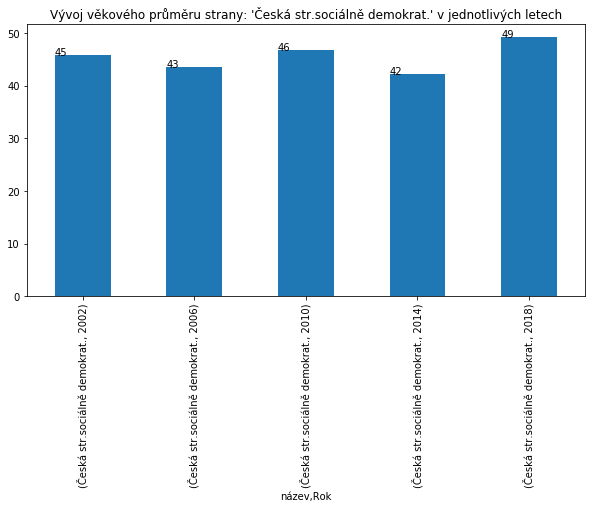

In [153]:
data = pd.read_csv('people_data.csv', na_values=["", "-"])
df = data.groupby(["název"]).size()
df.keys()
for party in df.keys(): 
    df = data.loc[data.název == party]
    df = df.groupby(["název", "Rok"]).mean()
    df = df["věk"]
    if len(df) > 2:
        ax = df.plot(kind='bar')
        plt.title("Vývoj věkového průměru strany: '" + party + "' v jednotlivých letech")
        autolabel2(ax)
        plt.show()

### Statistiky týkající se celkových výsledků voleb a volební účasti

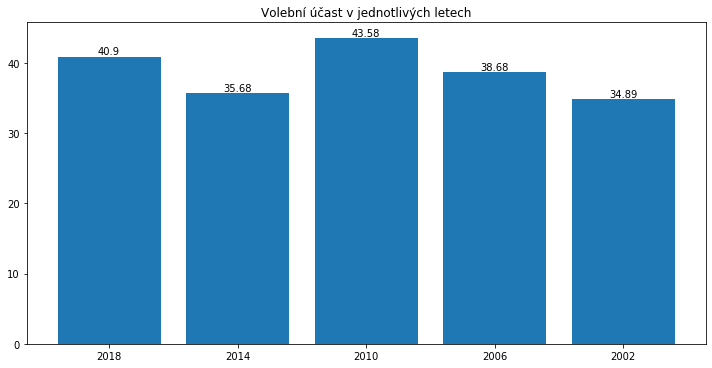

In [154]:
data = pd.read_csv('summary.csv', na_values=["", "-"])
summ = {}
data = data["Volebníúčast v %"]
fig, ax = plt.subplots()

for i in range(len(getYears())):
    summ[getYears()[i]] = data[i]
rect = ax.bar(range(len(summ)), list(summ.values()), align='center')
plt.xticks(range(len(summ)), list(summ.keys()))
autolabel(rect)
fig.tight_layout()
plt.title("Volební účast v jednotlivých letech")
plt.show()

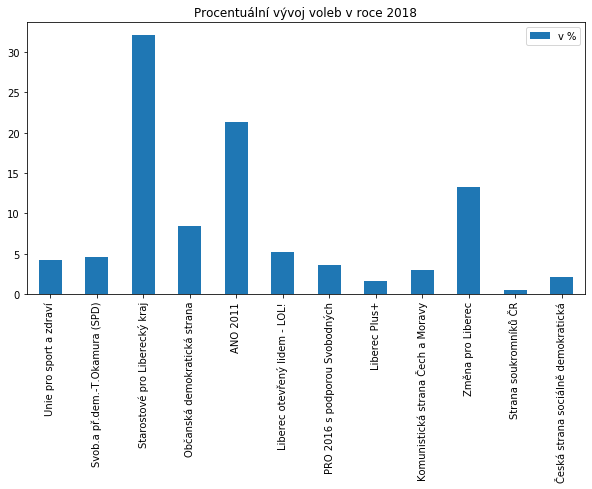

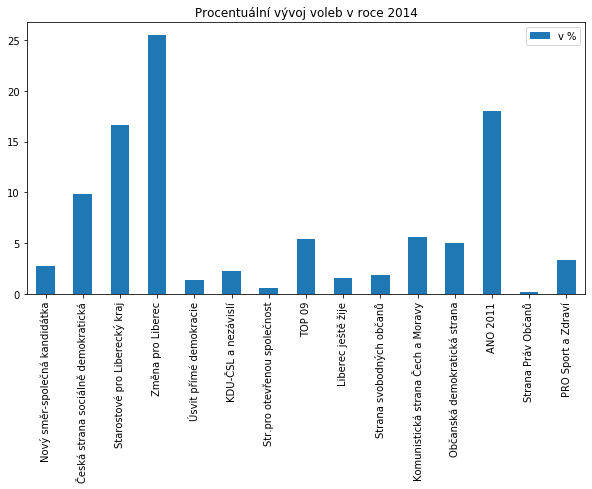

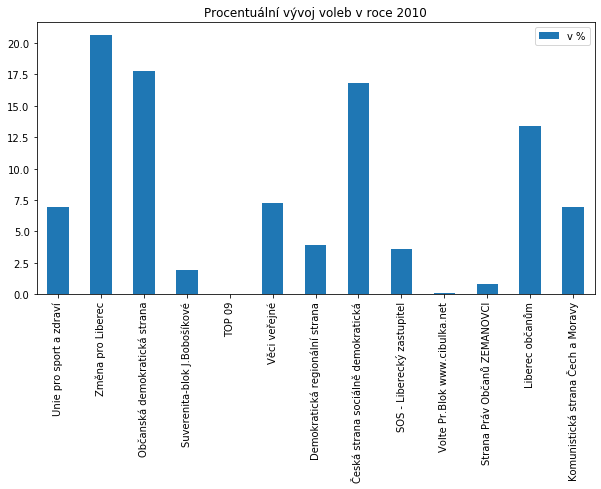

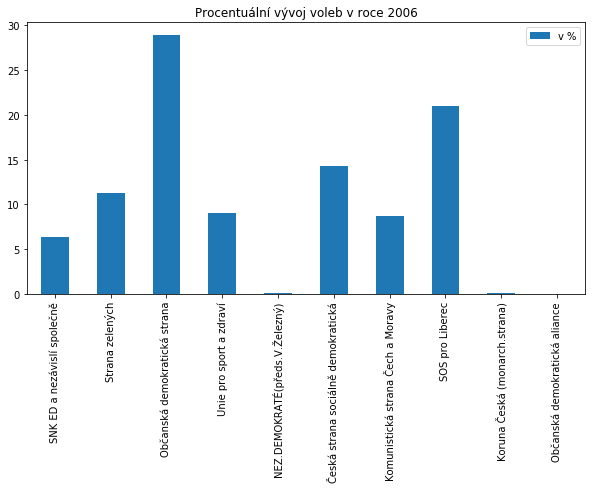

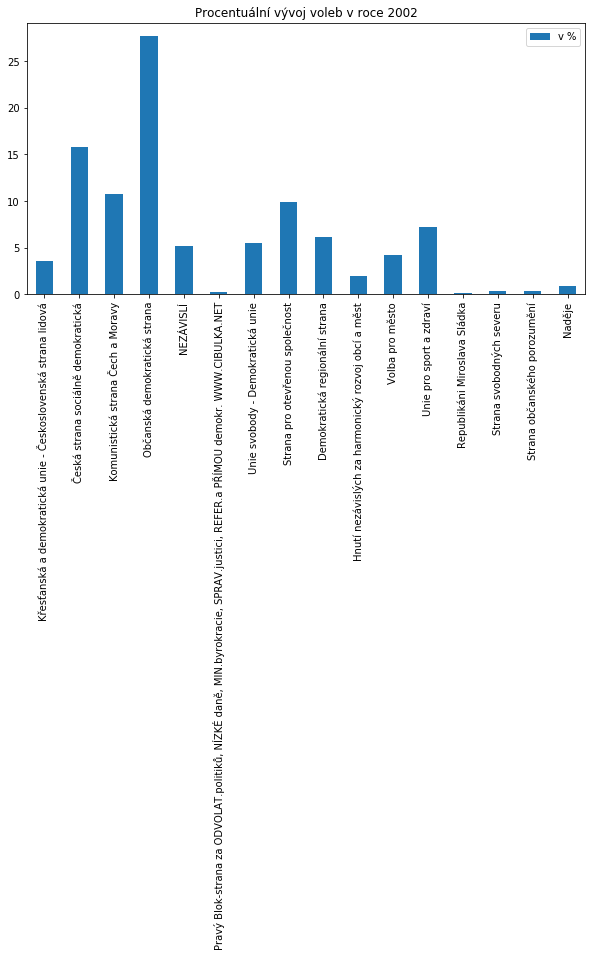

In [155]:
data = pd.read_csv('party_data.csv', na_values=["", "-"])

for year in getYears(): 
    df = data.loc[data.Rok == year][['název','v %']]
    df.plot(kind="bar")
    plt.xticks(range(len(list(df["název"]))), list(df["název"]))
    plt.title("Procentuální vývoj voleb v roce " + str(year))
    plt.show()


### Pokuste se u jednotlivých kandidátů zjistit, zda kandidovali ve více volbách. Najděte 10 nejpilnějších kandidátů a vypište jejich volební zisky a za jaké strany kandidovali.

In [156]:
# nejpilnější kandidáti
data = pd.read_csv('people_data.csv', na_values=["", "-"])
df = data.groupby(["příjmení, jméno, tituly"]).size()
df = df.sort_values(ascending=False)
df = df.loc[df == 4]
for i in range(len(df)): # ti, kterí kandidovali ve všech sledovaných letech
    name, cnt = df.keys()[i], df[i]
    frame = data[data["příjmení, jméno, tituly"].str.contains(name)]
    frame = frame.drop(columns=["Unnamed: 0", "číslo", "poř.číslo"]).sort_values(by="Rok")
    display(frame)

,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1709,Strana zelených,Tachovská Zuzana,Mgr.,36,SZ,BEZPP,3 472,2.71,4.0,NaN,2006
1416,Změna pro Liberec,Tachovská Zuzana,Mgr.,40,SZ,SZ,7 074,2.81,1.0,NaN,2010
978,Změna pro Liberec,Tachovská Zuzana,Mgr.,44,Změna,Změna,7 025,2.64,8.0,*,2014
383,Změna pro Liberec,Tachovská Zuzana,Mgr.,48,Změna,Změna,4 269,2.70,2.0,NaN,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
2096,Unie svobody-Demokratická unie,Petrovský Ondřej,NaN,21,US-DEU,US-DEU,1 290,2.38,22.0,NaN,2002
1329,Změna pro Liberec,Petrovský Ondřej,Mgr.,29,NK,BEZPP,7 095,2.82,3.0,NaN,2010
850,Změna pro Liberec,Petrovský Ondřej,Mgr.,33,Zelení,Zelení,7 230,2.72,7.0,*,2014
288,Změna pro Liberec,Petrovský Ondřej,Mgr.,37,Zelení,Zelení,4 472,2.83,4.0,*,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
2257,Občanská demokratická strana,Vojtíšek Vladimír,Ing.,43,ODS,ODS,7 154,2.61,7.0,NaN,2002
1737,Občanská demokratická strana,Vojtíšek Vladimír,Ing.,47,ODS,ODS,8 587,2.63,12.0,*,2006
1442,Občanská demokratická strana,Vojtíšek Vladimír,Ing.,51,ODS,ODS,5 584,2.58,7.0,NaN,2010
426,Unie pro sport a zdraví,Vojtíšek Vladimír,Ing.,59,USZ,BEZPP,1 003,1.98,NaN,NaN,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1914,Občanská demokratická strana,Jarošová Naděžda,NaN,46,ODS,ODS,7 277,2.66,8.0,*,2002
1549,Občanská demokratická strana,Jarošová Naděžda,NaN,50,ODS,ODS,8 471,2.59,7.0,*,2006
1166,Občanská demokratická strana,Jarošová Naděžda,NaN,54,ODS,ODS,5 620,2.60,1.0,NaN,2010
154,Občanská demokratická strana,Jarošová Naděžda,NaN,62,ODS,ODS,2 556,2.56,10.0,NaN,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1826,Česká str.sociálně demokrat.,Dušek Petr,NaN,32,ČSSD,ČSSD,3 999,2.57,12.0,NaN,2002
1501,Česká str.sociálně demokrat.,Dušek Petr,NaN,36,ČSSD,ČSSD,3 913,2.42,26.0,NaN,2006
1105,Česká str.sociálně demokrat.,Dušek Petr,NaN,40,ČSSD,ČSSD,5 139,2.50,20.0,NaN,2010
562,Česká str.sociálně demokrat.,Dušek Petr,NaN,44,ČSSD,ČSSD,2 515,2.45,25.0,NaN,2014


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
2173,Komunistická str.Čech a Moravy,Svoboda Antonín,Ing.,42,KSČM,KSČM,2 828,2.67,3.0,NaN,2002
1687,Komunistická str.Čech a Moravy,Svoboda Antonín,Ing.,46,KSČM,BEZPP,2 768,2.79,1.0,NaN,2006
1381,Komunistická str.Čech a Moravy,Svoboda Antonín,Ing.,50,KSČM,KSČM,2 347,2.78,2.0,NaN,2010
930,Strana Práv Občanů,Svoboda Antonín,NaN,63,SPO,BEZPP,46,2.28,NaN,NaN,2014


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
2102,Unie pro sport a zdraví,Piskačová Petra,NaN,26,USZ,BEZPP,1 821,2.57,16.0,NaN,2002
1653,Unie pro sport a zdraví,Piskačová Petra,NaN,30,USZ,BEZPP,2 451,2.39,18.0,NaN,2006
1333,Unie pro sport a zdraví,Piskačová Petra,NaN,34,USZ,BEZPP,1 984,2.34,20.0,NaN,2010
291,Unie pro sport a zdraví,Piskačová Petra,NaN,42,USZ,BEZPP,1 295,2.55,NaN,NaN,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1656,SOS pro Liberec,Prade Robert,NaN,34,SOS,BEZPP,6 485,2.73,9.0,NaN,2006
1341,Liberec občanům,Prade Robert,NaN,38,NK,BEZPP,3 594,2.20,29.0,NaN,2010
862,Starostové pro Liberecký kraj,Prade Robert,NaN,42,SLK,BEZPP,4 732,2.73,2.0,NaN,2014
304,Starostové pro Liberecký kraj,Prade Robert,NaN,46,SLK,BEZPP,10 037,2.63,11.0,*,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1700,SOS pro Liberec,Šolc Jiří,NaN,28,Suveren.,BEZPP,7 179,3.03,3.0,*,2006
1398,Liberec občanům,Šolc Jiří,Bc.,32,SLK,SLK,6 519,3.99,1.0,*,2010
957,Starostové pro Liberecký kraj,Šolc Jiří,Mgr.,36,SLK,SLK,5 410,3.12,1.0,*,2014
371,Starostové pro Liberecký kraj,Šolc Jiří,Mgr.,40,SLK,BEZPP,10 837,2.83,2.0,*,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
2138,Str.pro otevřenou společnost,Rozkovcová Jitka,MUDr.,62,SOS,SOS,2 983,3.04,1.0,NaN,2002
1670,SOS pro Liberec,Rozkovcová Jitka,MUDr.,66,SOS,SOS,6 478,2.73,17.0,NaN,2006
1360,Liberec občanům,Rozkovcová Jitka,MUDr.,70,NK,BEZPP,4 369,2.67,11.0,NaN,2010
885,Starostové pro Liberecký kraj,Rozkovcová Jitka,MUDr.,74,SLK,BEZPP,4 269,2.46,23.0,NaN,2014


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
2118,Str.pro otevřenou společnost,Princ Tomáš,Ing.,53,SOS,BEZPP,2 685,2.74,13.0,NaN,2002
1658,SOS pro Liberec,Princ Tomáš,Ing.,57,SOS,SOS,6 440,2.71,7.0,NaN,2006
1342,Liberec občanům,Princ Tomáš,Ing.,61,NK,BEZPP,4 458,2.73,6.0,NaN,2010
865,Starostové pro Liberecký kraj,Princ Tomáš,Ing.,65,SLK,BEZPP,4 501,2.60,8.0,NaN,2014


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1895,Česká str.sociálně demokrat.,Hruša František,Ing.,53,ČSSD,ČSSD,4 658,2.99,3.0,*,2002
1536,Česká str.sociálně demokrat.,Hruša František,Ing.,57,ČSSD,ČSSD,4 464,2.76,3.0,*,2006
1155,Česká str.sociálně demokrat.,Hruša František,Ing.,61,ČSSD,ČSSD,5 620,2.74,6.0,*,2010
133,Česká str.sociálně demokrat.,Hruša František,Ing.,69,ČSSD,ČSSD,537,2.13,NaN,NaN,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
2227,Komunistická str.Čech a Moravy,Ullrich Jindřich,NaN,55,KSČM,KSČM,2 613,2.46,25.0,NaN,2002
1721,Komunistická str.Čech a Moravy,Ullrich Jindřich,NaN,59,KSČM,KSČM,2 498,2.52,19.0,NaN,2006
1423,Komunistická str.Čech a Moravy,Ullrich Jindřich,NaN,63,KSČM,KSČM,1 804,2.14,36.0,NaN,2010
985,Komunistická str.Čech a Moravy,Ullrich Jindřich,NaN,67,KSČM,KSČM,1 346,2.30,35.0,NaN,2014


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
2123,Křesť.demokr.unie-Čs.str.lid.,Puhal Jan,Ing.,52,KDU-ČSL,BEZPP,928,2.61,NaN,NaN,2002
1663,NEZ.DEMOKRATÉ(předs.V.Železný),Puhal Jan,Ing.,56,NEZ/DEM,NEZ/DEM,247,12.80,NaN,NaN,2006
874,ANO 2011,Puhal Jan,Ing.,64,ANO,BEZPP,4 786,2.54,16.0,NaN,2014
312,ANO 2011,Puhal Jan,Ing.,68,ANO,ANO,6 565,2.58,4.0,NaN,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
2228,Komunistická str.Čech a Moravy,Ullrich Milan,NaN,52,KSČM,BEZPP,2 564,2.42,28.0,NaN,2002
1722,Komunistická str.Čech a Moravy,Ullrich Milan,NaN,55,KSČM,KSČM,2 484,2.51,22.0,NaN,2006
1424,Komunistická str.Čech a Moravy,Ullrich Milan,NaN,59,KSČM,KSČM,2 010,2.38,31.0,NaN,2010
986,Komunistická str.Čech a Moravy,Ullrich Milan,NaN,63,KSČM,KSČM,1 423,2.44,30.0,NaN,2014


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1647,Česká str.sociálně demokrat.,Pěnička Zbyněk,NaN,55,ČSSD,ČSSD,4 271,2.64,3.0,NaN,2006
1323,Česká str.sociálně demokrat.,Pěnička Zbyněk,NaN,59,ČSSD,ČSSD,5 161,2.51,22.0,NaN,2010
840,Česká str.sociálně demokrat.,Pěnička Zbyněk,NaN,63,ČSSD,ČSSD,2 548,2.48,22.0,NaN,2014
281,Česká str.sociálně demokrat.,Pěnička Zbyněk,NaN,67,ČSSD,ČSSD,602,2.38,NaN,NaN,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
2200,Křesť.demokr.unie-Čs.str.lid.,Šourek Petr,Ing.,57,KDU-ČSL,KDU-ČSL,913,2.57,NaN,NaN,2002
1702,SOS pro Liberec,Šourek Petr,Ing.,61,KDU-ČSL,KDU-ČSL,6 709,2.83,5.0,*,2006
1403,Liberec občanům,Šourek Petr,Ing.,65,KDU-ČSL,KDU-ČSL,4 305,2.63,3.0,NaN,2010
962,KDU-ČSL a nezávislí,Šourek Petr,Ing.,69,KDU-ČSL,KDU-ČSL,569,2.37,NaN,NaN,2014


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1808,Občanská demokratická strana,Červinka Ondřej,Bc.,25,ODS,ODS,7 566,2.77,5.0,*,2002
1490,Občanská demokratická strana,Červinka Ondřej,Ing.,29,ODS,ODS,8 763,2.68,2.0,*,2006
1089,Občanská demokratická strana,Červinka Ondřej,Ing.,33,ODS,ODS,5 881,2.72,5.0,*,2010
534,Občanská demokratická strana,Červinka Ondřej,Ing.,37,ODS,ODS,1 762,3.34,1.0,*,2014


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
2027,Křesť.demokr.unie-Čs.str.lid.,Marek Jan,JUDr.,53,KDU-ČSL,KDU-ČSL,1 379,3.88,NaN,NaN,2002
1276,Liberec občanům,Marek Jan,Mgr.,31,KDU-ČSL,BEZPP,3 803,2.32,23.0,NaN,2010
791,Starostové pro Liberecký kraj,Marek Jan,Mgr.,35,SLK,BEZPP,4 634,2.67,8.0,*,2014
244,Starostové pro Liberecký kraj,Marek Jan,Mgr.,39,SLK,BEZPP,10 161,2.66,9.0,*,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1801,Str.pro otevřenou společnost,Cvrček Vladimír,Mgr.,63,SOS,BEZPP,2 307,2.35,21.0,NaN,2002
1085,Liberec občanům,Cvrček Vladimír,Mgr.,71,NK,BEZPP,3 730,2.28,25.0,NaN,2010
518,Starostové pro Liberecký kraj,Cvrček Vladimír,Mgr.,75,SLK,BEZPP,4 412,2.55,11.0,NaN,2014
44,Starostové pro Liberecký kraj,Cvrček Vladimír,Mgr.,79,SLK,BEZPP,9 286,2.43,17.0,NaN,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1766,Komunistická str.Čech a Moravy,Bělohlávek Jiří,NaN,52,KSČM,KSČM,2 971,2.80,4.0,*,2002
1471,Komunistická str.Čech a Moravy,Bělohlávek Jiří,NaN,56,KSČM,KSČM,2 490,2.51,26.0,NaN,2006
1056,Komunistická str.Čech a Moravy,Bělohlávek Jiří,NaN,60,KSČM,KSČM,2 228,2.64,8.0,NaN,2010
17,Komunistická str.Čech a Moravy,Bělohlávek Jiří,NaN,68,KSČM,KSČM,917,2.54,NaN,NaN,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1989,NEZÁVISLÍ,Krobot Petr,MVDr.,58,NEZ,NEZ,2 526,4.97,4.0,NaN,2002
1591,Unie pro sport a zdraví,Krobot Petr,MVDr.,62,USZ,USZ,2 864,2.79,17.0,NaN,2006
1234,Unie pro sport a zdraví,Krobot Petr,MVDr.,66,USZ,USZ,2 251,2.65,24.0,NaN,2010
744,PRO Sport a Zdraví,Krobot Petr,MVDr.,70,PRO ZS,USZ,941,2.70,NaN,NaN,2014


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1990,Česká str.sociálně demokrat.,Kroll Martin,Bc.,37,ČSSD,ČSSD,4 140,2.66,8.0,NaN,2002
1592,Česká str.sociálně demokrat.,Kroll Martin,Bc.,41,ČSSD,ČSSD,4 269,2.64,13.0,NaN,2006
1235,Česká str.sociálně demokrat.,Kroll Martin,Mgr.,45,ČSSD,ČSSD,5 154,2.51,23.0,NaN,2010
745,Česká str.sociálně demokrat.,Kroll Martin,Mgr.,49,ČSSD,ČSSD,2 649,2.58,18.0,NaN,2014


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1599,SOS pro Liberec,Kvapil Vítězslav,NaN,59,SOS,SOS,5 838,2.46,19.0,NaN,2006
1247,SOS - Liberecký zastupitel,Kvapil Vítězslav,NaN,63,SOS,SOS,1 241,2.85,NaN,NaN,2010
758,ANO 2011,Kvapil Vítězslav,NaN,67,ANO,BEZPP,4 562,2.42,24.0,NaN,2014
218,ANO 2011,Kvapil Vítězslav,NaN,71,ANO,ANO,6 605,2.60,10.0,*,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1759,Demokratická regionální strana,Bartoš Jan,NaN,58,DRS,DRS,1 336,2.21,24.0,NaN,2002
1051,Demokratická regionální strana,Bartoš Jan,NaN,66,DRS,DRS,976,2.05,NaN,NaN,2010
472,Úsvit přímé demokracie,Bartoš Jan,NaN,70,Úsvit,BEZPP,401,2.76,NaN,NaN,2014
7,Svob.a př.dem.-T.Okamura (SPD),Bartoš Jan,NaN,74,SPD,SPD,1 424,2.61,NaN,NaN,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1489,SNK ED a nezávislí společně,Černý Petr,NaN,32,SNK ED,SNK ED,2 329,3.22,3.0,NaN,2006
1088,Věci veřejné,Černý Petr,Bc.,36,VV,VV,4 104,4.64,1.0,*,2010
528,Nový směr-společná kandidátka,Černý Petr,Ing. Mgr.,40,NOS,NOS,1 544,5.46,NaN,NaN,2014
53,Liberec Plus+,Černý Petr,Ing. Mgr.,44,NOS,NOS,814,4.37,NaN,NaN,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1081,Strana Práv Občanů ZEMANOVCI,Cihlář Jiří,Ing.,54,SPOZ,SPOZ,564,6.04,NaN,NaN,2010
1082,Strana Práv Občanů ZEMANOVCI,Cihlář Jiří,NaN,28,SPOZ,SPOZ,246,2.63,NaN,NaN,2010
515,Strana Práv Občanů,Cihlář Jiří,Ing.,58,SPO,SPO,114,5.65,NaN,NaN,2014
42,Komunistická str.Čech a Moravy,Cihlář Jiří,Ing.,62,KSČM,KSČM,957,2.65,NaN,NaN,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1756,Unie pro sport a zdraví,Bahníková Štefania,Ing.,49,USZ,USZ,2 320,3.27,4.0,NaN,2002
1467,Unie pro sport a zdraví,Bahníková Štefania,Ing.,53,USZ,USZ,2 739,2.67,6.0,NaN,2006
1047,Unie pro sport a zdraví,Bahníková Štefania,Ing.,57,USZ,USZ,2 038,2.40,22.0,NaN,2010
467,PRO Sport a Zdraví,Bahníková Štefania,Ing.,61,PRO ZS,USZ,697,2.00,NaN,NaN,2014


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
2236,Str.pro otevřenou společnost,Václavík David,PhDr.,27,SOS,BEZPP,3 488,3.56,3.0,*,2002
1725,Strana zelených,Václavík David,PhDr. Ph.D.,31,SZ,SZ,4 338,3.38,2.0,*,2006
1430,Liberec občanům,Václavík David,doc. PhDr. Ph.D.,35,NK,BEZPP,5 248,3.21,4.0,*,2010
989,Starostové pro Liberecký kraj,Václavík David,doc. PhDr. Ph.D.,39,SLK,BEZPP,4 897,2.83,6.0,*,2014


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1819,Hn.za harm.rozvoj obcí a měst,Dostrašilová Věra,NaN,38,HNHRM,BEZPP,399,2.05,NaN,NaN,2002
1496,SNK ED a nezávislí společně,Dostrašilová Věra,NaN,42,SNK ED,SNK ED,1 856,2.57,11.0,NaN,2006
1098,Věci veřejné,Dostrašilová Věra,NaN,46,VV,VV,2 462,2.78,4.0,NaN,2010
554,Nový směr-společná kandidátka,Dostrašilová Věra,NaN,50,NOS,NOS,785,2.77,NaN,NaN,2014


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
1634,Unie pro sport a zdraví,Novotný Pavel,Ing.,44,USZ,BEZPP,2 315,2.26,21.0,NaN,2006
1310,Unie pro sport a zdraví,Novotný Pavel,Ing.,48,USZ,BEZPP,2 305,2.72,4.0,NaN,2010
823,PRO Sport a Zdraví,Novotný Pavel,Ing.,52,PRO ZS,BEZPP,910,2.61,NaN,NaN,2014
270,Unie pro sport a zdraví,Novotný Pavel,Ing.,56,USZ,BEZPP,1 126,2.22,NaN,NaN,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
2264,Komunistická str.Čech a Moravy,Vondruška Josef,JUDr.,54,KSČM,KSČM,3 251,3.06,2.0,*,2002
1445,Komunistická str.Čech a Moravy,Vondruška Josef,JUDr.,62,KSČM,KSČM,2 305,2.73,3.0,NaN,2010
1010,Komunistická str.Čech a Moravy,Vondruška Josef,JUDr.,66,KSČM,KSČM,1 534,2.63,13.0,NaN,2014
432,Komunistická str.Čech a Moravy,Vondruška Josef,JUDr.,70,KSČM,KSČM,945,2.62,NaN,NaN,2018


,název,"příjmení, jméno, tituly",Tituly,věk,Navrhujícístrana,Politickápříslušnost,abs.,v %,Pořadízvolení/náhradníka,Mandát,Rok
2001,Křesť.demokr.unie-Čs.str.lid.,Kubín Stanislav,NaN,59,KDU-ČSL,KDU-ČSL,681,1.91,NaN,NaN,2002
1595,SOS pro Liberec,Kubín Stanislav,NaN,63,KDU-ČSL,KDU-ČSL,5 933,2.50,15.0,NaN,2006
1241,Liberec občanům,Kubín Stanislav,NaN,67,KDU-ČSL,KDU-ČSL,3 904,2.39,18.0,NaN,2010
752,KDU-ČSL a nezávislí,Kubín Stanislav,NaN,71,KDU-ČSL,KDU-ČSL,597,2.49,NaN,NaN,2014


### U titulů se pokuste rozlišit i různé stupně vzdělání: bakalářský, magisterský, doktorský a vyšší, vojenská hodnost atp. Zkuste odhadnout i podíl žen na kandidátkách.

{'Bakalarsky': 77,
 'Magisterský (Mgr)': 198,
 'Docent': 4,
 'Magisterský (Ing)': 445,
 'Magisterský (jiný)': 166,
 'Doktorský': 33,
 'Profesor': 8}

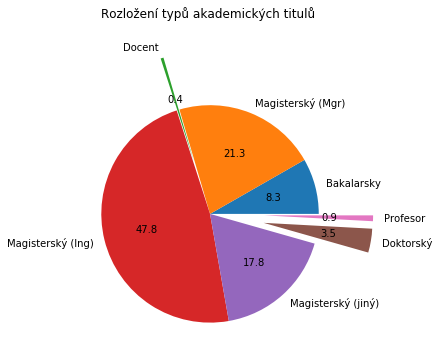

In [160]:
data = pd.read_csv('people_data.csv', na_values=["", "-"])
df = data.loc[data.Tituly > ""]
title_summ = {
    "Bakalarsky": 0,
    "Magisterský (Mgr)": 0,
    "Docent": 0,
    "Magisterský (Ing)": 0,
    "Magisterský (jiný)": 0,
    "Doktorský": 0,
    "Profesor": 0,
             }

for title in df["Tituly"]:
    for part in title.split():
        if "Bc" in part:
            title_summ["Bakalarsky"] = title_summ["Bakalarsky"] + 1
        elif "Mgr" in part:
            title_summ["Magisterský (Mgr)"] = title_summ["Magisterský (Mgr)"] + 1
        elif "Ing" in part:
            title_summ["Magisterský (Ing)"] = title_summ["Magisterský (Ing)"] + 1
        elif part in ["Ph.D.", "DSc.", "CSc.", "Dr.", "DrSc.", "Th.D."]:
            title_summ["Doktorský"] = title_summ["Doktorský"] + 1
        elif "doc" in part:
            title_summ["Docent"] = title_summ["Docent"] + 1
        elif "prof" in part:
            title_summ["Profesor"] = title_summ["Profesor"] + 1
        else:
            title_summ["Magisterský (jiný)"] = title_summ["Magisterský (jiný)"] + 1
display(title_summ)
plt.pie(title_summ.values(),explode=(0, 0, 0.5, 0, 0, 0.5, 0.5), labels=title_summ.keys(), autopct="%1.1f")
plt.title("Rozložení typů akademických titulů ", y=1.2)
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

Text(0.5, 1, "Odhad poměru mužů a žen na kandidátkách (konec  příjmení končí na 'a')")

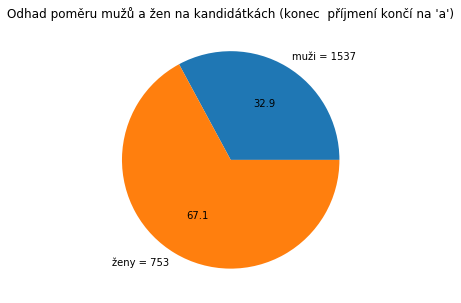

In [204]:
data = pd.read_csv('people_data.csv', na_values=["", "-"])
female = 0
male = 0
for name in data["příjmení, jméno, tituly"]:
    if name.split()[0].endswith("á"):
        female += 1
    else:
        male += 1
plt.pie([female, male], labels=["muži = " + str(male), "ženy = " + str(female)], autopct="%1.1f")
plt.title("Odhad poměru mužů a žen na kandidátkách (konec  příjmení končí na 'á')", y=1)